<a href="https://colab.research.google.com/github/pedrosoriaa1a/Predicci-n_grasa/blob/main/Predicci%C3%B3n_de_grasa_corporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recolección de datos 



Esta base de datos proviene de https://www.kaggle.com/ contiene 252 registros de personas con medidas corporales como peso, altura, densidad, grasa, edad, entre otras.

Las variables enumeradas a continuación, de izquierda a derecha, son

* Densidad determinada a partir del pesaje subacuático
* Porcentaje de grasa corporal a partir de la ecuación de Siri (1956)
* Edad (años)
* Peso (libras)
* Altura (pulgadas)
* Circunferencia del cuello (cm)
* Circunferencia del pecho (cm)
* Circunferencia del abdomen 2 (cm)
* Perímetro de la cadera (cm)
* Perímetro del muslo (cm)
* Perímetro de la rodilla (cm)
* Perímetro del tobillo (cm)
* Perímetro del bíceps (extendido) (cm)
* Circunferencia del antebrazo (cm)
* Circunferencia de la muñeca (cm)

### Problemática 



La medición precisa de la grasa corporal es incómoda/costosa y es deseable disponer de métodos fáciles de estimar la grasa corporal que no sean incómodos/costosos.

## Librerías a usar

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

## Entendiendo los datos

### Cargando dataset

In [2]:
data = pd.read_csv("bodyfat.txt", sep = " ")
data.head()

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Sanity check

In [3]:
# Forma del dataset
data.shape

(252, 15)

In [4]:
# Información sobre nuestras variables y tipo de dato 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1 to 252
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Fat      252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 31.5 KB


In [5]:
# Valores nulos en el dataset
data.isnull().sum()

Density    0
Fat        0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [6]:
# Valores NA 
data.isna().sum()

Density    0
Fat        0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

El dataset no cuenta con valores NULOS o valores NA por lo que es buena señal.

## Análisis exploratorio de los datos

In [7]:
# Análisis de las columnas con valores numéricos 
data.describe()

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


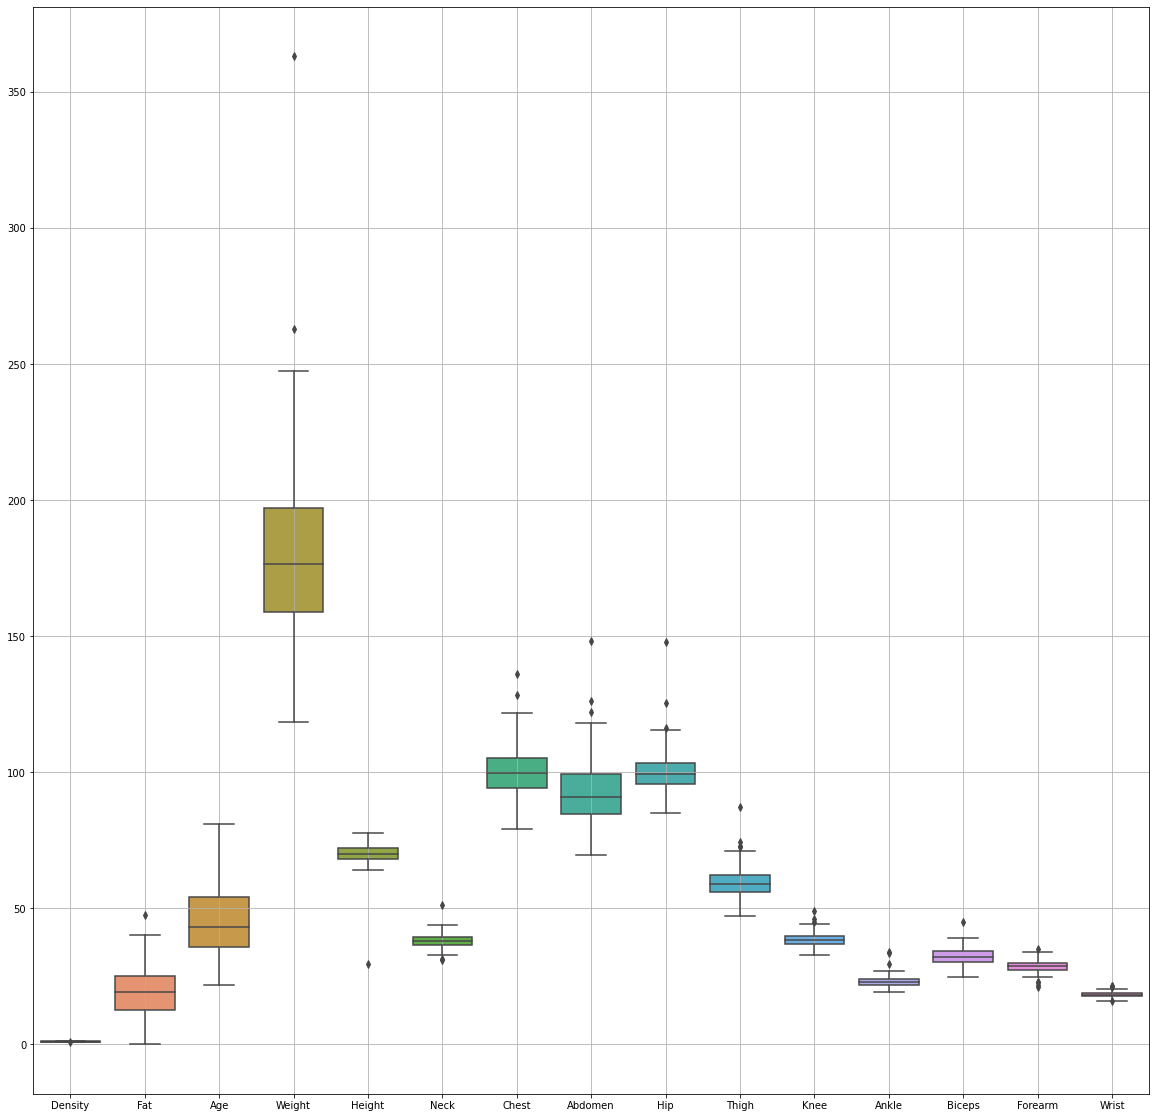

In [8]:
plt.figure(figsize = (20, 20), facecolor = 'white')
sns.boxplot(data = data)
plt.grid()
plt.show()

*  Se observan algunos datos atípicos, lo que podría generar algún sesgo en las variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c4693e850>,
      dtype=object)

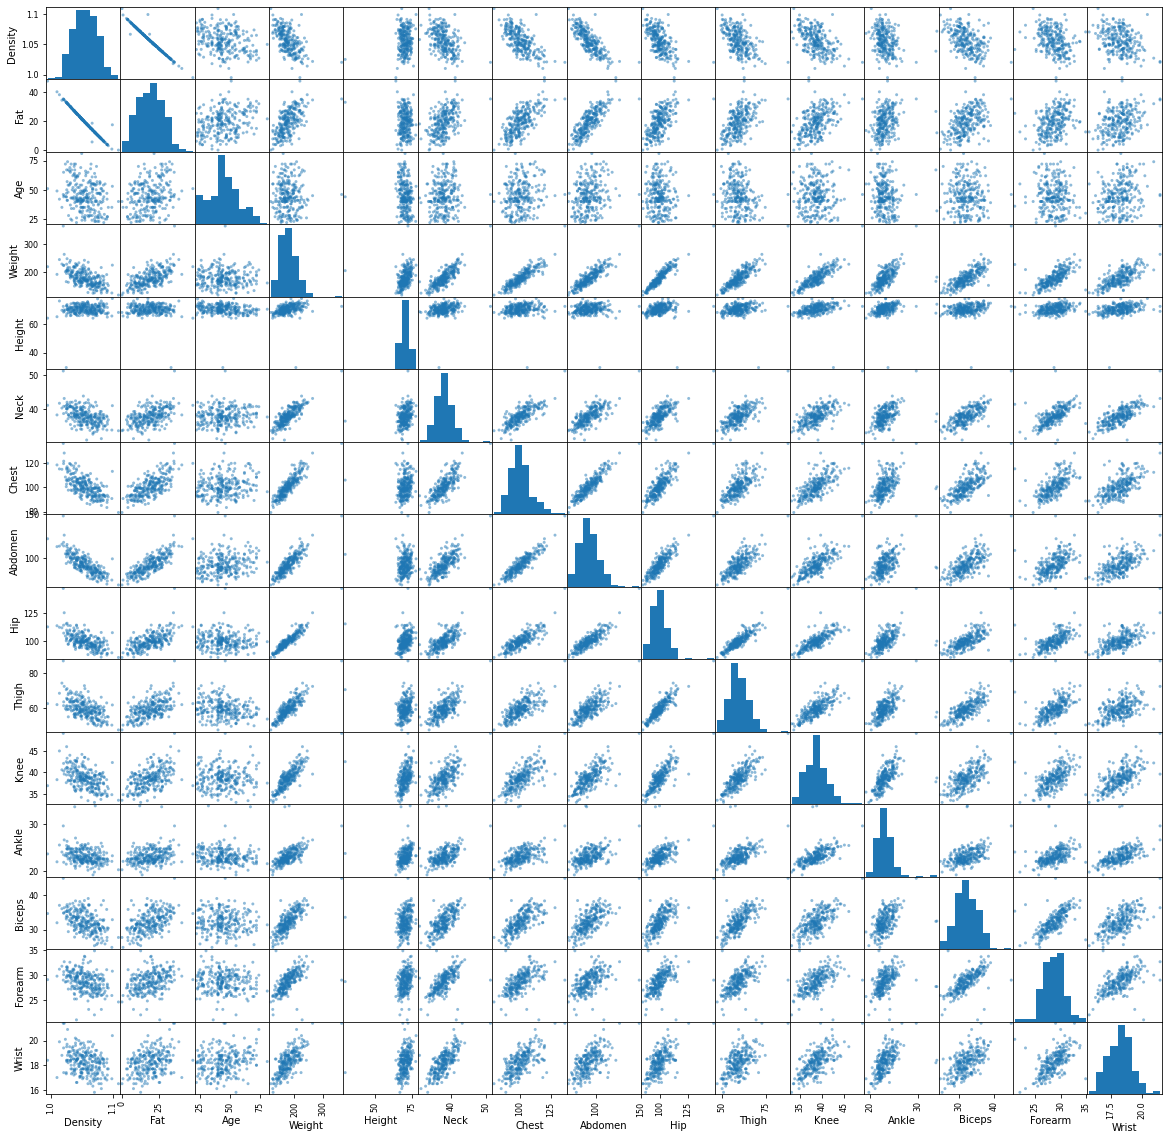

In [9]:
pd.plotting.scatter_matrix(data,
                           figsize=(20,20))

In [10]:
# Columnas más sesgadas
data.skew().sort_values()

Height    -5.384987
Forearm   -0.219333
Density   -0.020176
Fat        0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64

*  Confirmamos el sesgo en variables como *Weight*, *Hip* y *Ankle*

### Datos atípicos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


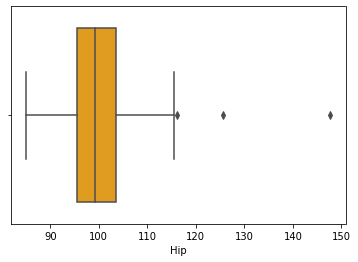

In [11]:
sns.boxplot(data['Hip'], color = 'orange')

In [12]:
data[data['Hip'] > 115]

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
35,1.0263,32.3,41,247.25,73.50,42.1,117.0,115.6,116.1,71.2,43.3,26.3,37.3,31.7,19.7
39,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,1.0250,32.9,44,205.00,29.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


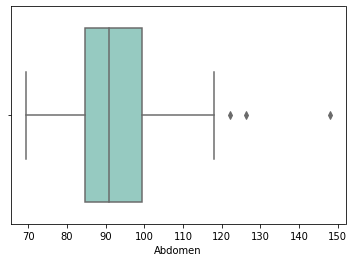

In [13]:
sns.boxplot(data['Abdomen'], palette = 'Set3')

In [14]:
data[data['Abdomen'] > 120]

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
39,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
216,0.9950,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


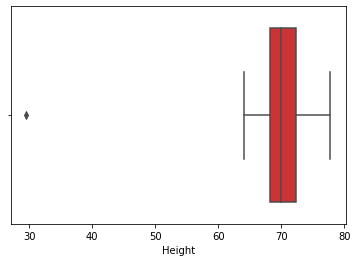

In [15]:
sns.boxplot(data['Height'], palette = 'Set1')

In [16]:
data[data['Height'] < 40]

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
42,1.025,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


* En este caso tenemos un dato verdaderamente atípico, el registro número 42 es una persona con altura de 29.5 inch (74.93 cm) con una circunferencia abdominal de 104.3 cm, no eliminaremos este dato pero podría causar algún sesgo en el modelo.

Una vez hecho el análisis exploratorio de los datos nos surge una pregunta: 
¿El porcentaje de grasa (*fat*) depende únicamente del peso (*Weigth*)?

Para esto, debemos de ver la relación entre estas dos variables 

Text(0, 0.5, 'Fat (%)')

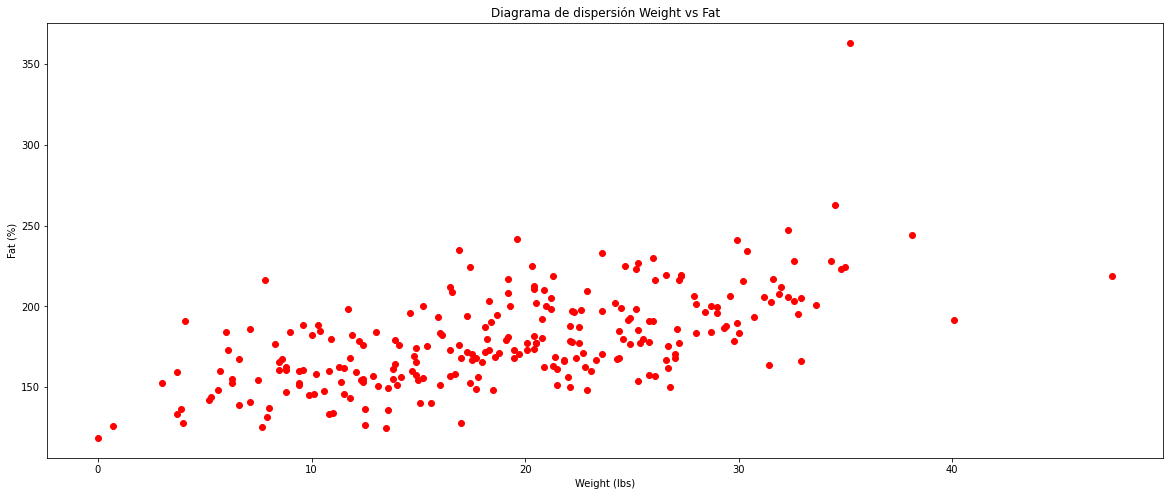

In [17]:
plt.figure(figsize=(20,8))
plt.title("Diagrama de dispersión Weight vs Fat")
plt.scatter(data['Fat'], data['Weight'], color = 'red')
plt.xlabel("Weight (lbs)")
plt.ylabel("Fat (%)")

La correlación entre las variables al parecer es de forma lineal positiva, tendremos que comprobar con un modelo de Regresión Lineal 

## Elección de modelo 

### Regresión lineal simple

#### Dividir dataset 

In [18]:
X = data.iloc[:,3:4] # Variable Weight únicamente
y = data.Fat 
X.shape, y.shape

((252, 1), (252,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [20]:
X_train.shape, y_train.shape

((201, 1), (201,))

In [21]:
X_test.shape, y_test.shape

((51, 1), (51,))

#### Ejecutando el modelo 

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)
ypred = lm.predict(X_test)

In [24]:
lm_score_train = lm.score(X_train, y_train)
lm_score_train

0.3410324287369789

#### Evaluación del modelo 

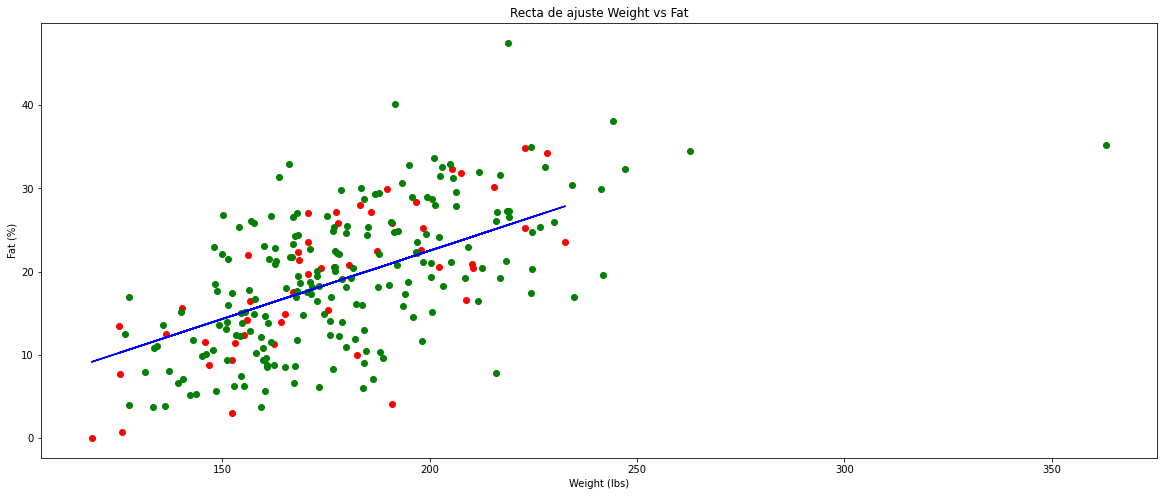

In [25]:
plt.figure(figsize=(20,8))
plt.title("Recta de ajuste Weight vs Fat")
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_test, ypred, color = 'blue')
plt.xlabel("Weight (lbs)")
plt.ylabel("Fat (%)")
plt.show()

In [26]:
lm_score_test = lm.score(X_test, y_test)
lm_score_test

0.49588134319773125

Al tener un coeficiente de $R^{2}$ bajo tanto en los datos de entrenamiento como en el modelo, podemos afirmar que la regresión lineal simple no explica de una manera adecuada la relación que tienen ambas variables.

Por este motivo se hará un modelo de regresión múltiple 

## Elección de modelo 

### Regresión lineal múltiple 

In [27]:
# Nuevos datos para entrenamiento 

X = data.iloc[:,[3, 7]] # Seleccionamos la variable Weight y Abdomen para la regresión múltiple 
y = data.Fat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
mulReg = LinearRegression()
mulReg = lm.fit(X_train, y_train)
ypred = mulReg.predict(X_test)

#### Evaluando modelo 

In [29]:
mulReg_score_train = mulReg.score(X_train, y_train)
mulReg_score_train


0.7356313288314673

In [30]:
mulReg_score_test = mulReg.score(X_test, y_test)
mulReg_score_test

0.6289986765174839

Se observa una mejora notoria en los dos scores ($R^2$) pero trataremos de mejorar el modelo escalando los datos 

## Con datos escalados 

Como el mejor resultado lo obtuvimos con la Regresión lineal múltiple, vamos a escalar los datos y a ocupar ese modelo. 

In [31]:
X = data.iloc[:,[3, 7]] # Seleccionamos la variable Weight y Abdomen para la regresión múltiple 
y = data.Fat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [32]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar al conjunto de Training
scaler.fit(X_train)

# Transformar los datos
X_train_scal = pd.DataFrame(scaler.transform(X_train))
X_train_scal.columns = X_train.columns
X_test_scal = pd.DataFrame(scaler.transform(X_test))
X_test_scal.columns = X_train.columns

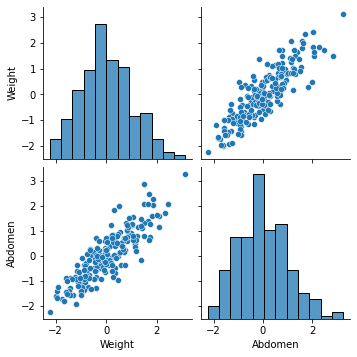

In [33]:
sns.pairplot(X_train_scal) # Verificamos que los datos han sido escalados 

### Ejecutando el modelo 

In [34]:
# Crear el objeto modelo
mulReg_scal = LinearRegression()

# Entrenamos el modelo lineal
mulReg_scal.fit(X_train_scal, y_train)

# Hacemos las predicciones del conjunto de testing
ypred_scal = mulReg_scal.predict(X_test_scal)

### Evaluando modelo 

In [35]:
mulReg__scal_score_train = mulReg_scal.score(X_train_scal, y_train)
mulReg__scal_score_train

0.732450872100314

In [36]:
# Score del modelo yReal - yPred
mulReg__scal_score_test = mulReg_scal.score(X_test_scal, y_test)
mulReg__scal_score_test

0.6520348375943332

## Conclusión 

Teniendo ya los tres modelos evaluados podemos llegar a la conlcusión que el mejor 

In [58]:
lista = [0, 1 , 2]
scores_train = [lm_score_train,  mulReg_score_train, mulReg__scal_score_train]
scores_test = [lm_score_test,  mulReg_score_test, mulReg__scal_score_test]

<function matplotlib.pyplot.show(*args, **kw)>

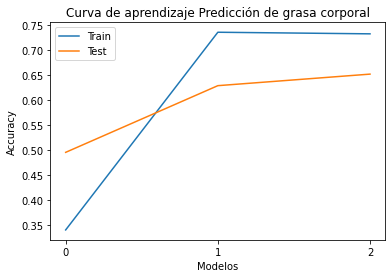

In [59]:
plt.title("Curva de aprendizaje Predicción de grasa corporal")
plt.plot(scores_train, label = 'Train')
plt.plot(scores_test, label = 'Test')
plt.xticks(lista)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.legend()
plt.show

Al mirar la gráfica podemos llegar a la conclusión que el mejor modelo corresponde a la *regresión lineal múltiple con datos escalados* ya que tiene un mejor ajuste tanto en el entrenamiento como en el test. 

Es decir, que la grasa corporal no sólo depende del peso de una persona, sino también depende de otras medidas tales como el abdomen.

## Convirtiendo el problema en clasificador de sobre peso

In [60]:
# Apartir del dataset original vamos a crear una nueva columna con el nombre IMC

data['IMC'] = round((data['Weight'] * 0.453592) / ((data['Height'] * 0.0254)**2), 2)
data.head()

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,IMC
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.63
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.33
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.67
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.88
5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.52


In [61]:
# Ahora creamos u nuevo dataset con la información del original y añadimos la variable sobre_peso
# Esta variable está en función del IMC, siendo 1 si la persona tiene sobre peso
df = data.copy()
df['sobre_peso'] = np.where(df['IMC'] > 24.9, 1, 0)

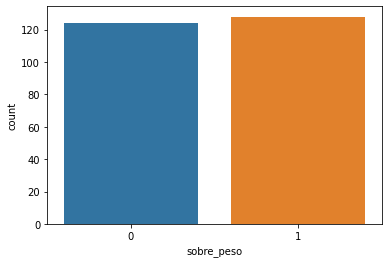

In [62]:
sns.countplot(data=df,
            x='sobre_peso')

Podemos ver que ambas clases de la variable objetivo están balanceadas 

### Dividir dataset

In [63]:
X = df.drop(['IMC', 'sobre_peso'], axis=1)
y = df.sobre_peso

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state=0)

### Elección del modelo 

#### Modelo: K-Nearest-Neighbor

##### Ejecutando el modelo 

In [67]:
# Creamos el modelo 
knn = KNeighborsClassifier(n_neighbors = 7)

# Ajustamos el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizamos la predicción
ypred = knn.predict(X_test)

##### Evaluando el modelo

In [73]:
knn_acc = accuracy_score(ypred, y_test)
print("Accuracy para KNN : ", round(knn_acc * 100, 2))

knn_pre = precision_score(ypred, y_test)
print('Recall para KNN : ', round(knn_pre * 100, 2))

knn_rcc = recall_score(ypred, y_test)
print('Pecision para KNN : ', round(knn_rcc * 100, 2))

Accuracy para KNN :  86.27
Recall para KNN :  80.77
Pecision para KNN :  91.3


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.91      0.81      0.86        26

    accuracy                           0.86        51
   macro avg       0.87      0.86      0.86        51
weighted avg       0.87      0.86      0.86        51



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


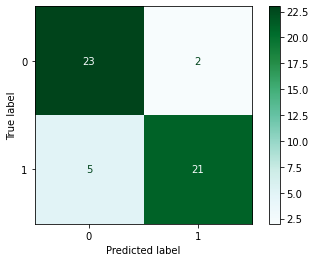

In [74]:
print(classification_report(y_test, ypred))
plot_confusion_matrix(knn, X_test, y_test, cmap='BuGn')
plt.show()

Al ver las métricas de *precision* y *recall* podemos decir que el modelo hace buenas clasificaciones al tener las dos métricas balanceadas. 

##### Escalando los datos

In [75]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar al conjunto de Training
scaler.fit(X_train)

# Transformar los datos
X_train_scal = pd.DataFrame(scaler.transform(X_train))
X_train_scal.columns = X_train.columns
X_test_scal = pd.DataFrame(scaler.transform(X_test))
X_test_scal.columns = X_train.columns


##### Ejecutando modelo con datos escalados 

In [76]:
knn_scal = KNeighborsClassifier(n_neighbors = 7)

knn_scal.fit(X_train_scal, y_train)

ypred = knn_scal.predict(X_test_scal)

##### Evaluando modelo con datos escalados

In [77]:
knn_scal_acc = accuracy_score(ypred, y_test)
print("Accuracy para KNN con datos escalados : ",round(knn_scal_acc * 100, 2))

knn_scal_pre = precision_score(ypred, y_test)
print('Recall para el Gradient Boosing Classifier : ', round(knn_scal_pre * 100, 2))

knn_scal_rcc = recall_score(ypred, y_test)
print('Pecision para el Gradient Boosing Classifier : ', round(knn_scal_rcc * 100, 2))

Accuracy para KNN con datos escalados :  90.2
Recall para el Gradient Boosing Classifier :  88.46
Pecision para el Gradient Boosing Classifier :  92.0


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.92      0.88      0.90        26

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


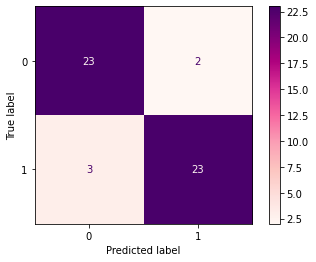

In [80]:
print(classification_report(y_test, ypred))
plot_confusion_matrix(knn_scal, X_test_scal, y_test, cmap = 'RdPu')
plt.show()

Vemos que ahora con los datos escalados el modelo hace una mejor clasificación de los datos, aumentando las métricas de *accuracy*, *precision* y *recall* 

### Curva de validación

In [81]:
range_k = [x for x in range(1,9,3)]

train_score, test_score = validation_curve(knn_scal,
                X,
                y,
                param_name = 'n_neighbors',
                param_range = range_k,
                cv = 3)

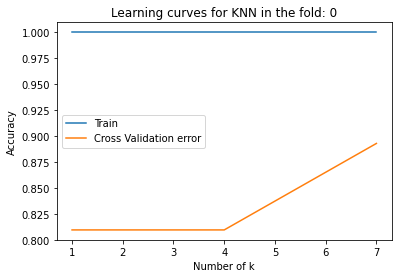

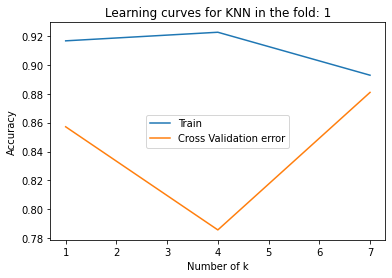

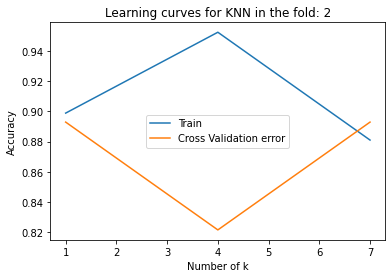

In [82]:
for i in range(len(train_score)):
  plt.plot(range_k,
          train_score[i],
          label='Train')
  plt.plot(range_k,
          test_score[i],
          label='Cross Validation error')
  plt.title('Learning curves for KNN in the fold: ' + str(i))
  plt.xlabel('Number of k')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Vemos que el modelo lo hace muy bien con un número de vecinos = 7, mientras que con un número de vecionos = 4 tiende a hacer overfitting 